#Model Quality and Improvements - Independent Project

##Problem Statement

#As a data professional working for a pharmaceutical company, you need to develop a model that predicts whether a patient will be diagnosed with diabetes. The model needs to have an accuracy score greater than 0.85.
#I am required to document the following steps during the analysis:
#● Data Importation
#● Data Exploration
#● Data Cleaning
#● Data Preparation
#● Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)
#● Model Evaluation
#● Hyparameter Tuning
#● Findings and Recommendations


##Data Importation

In [2]:
# Importing the necessary libraries 
import pandas as pd

# Dataset URL: https://bit.ly/DiabetesDS

diabetics_diagnosis_df = pd.read_csv("https://bit.ly/DiabetesDS")

diabetics_diagnosis_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Data Exploration

In [3]:
# Checking the dataset size for data exploration using .shape function
diabetics_diagnosis_df.shape

(768, 9)

In [5]:
# Checking null shapes in the dataset
diabetics_diagnosis_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Describing the Data in the dataset
diabetics_diagnosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Summary statistics for the data set
diabetics_diagnosis_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#See the amount of data on each target
diabetics_diagnosis_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# Expressing the outcome as a percentage
print('1. The percentage of patients without diabetes are ' 
      + str(round(((diabetics_diagnosis_df["Outcome"].isin([0]).sum())/diabetics_diagnosis_df.shape[0])*100,2)) + ' %')
print('2. The percentage of patients with diabetes are ' 
      + str(round(((diabetics_diagnosis_df["Outcome"].isin([1]).sum())/diabetics_diagnosis_df.shape[0])*100,2)) + ' %')

1. The percentage of patients without diabetes are 65.1 %
2. The percentage of patients with diabetes are 34.9 %


##Data Cleaning

In [10]:
# Checking column names
diabetics_diagnosis_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# Standardizing a dataset by stripping leading and trailing spaces and setting all columns to lower
diabetics_diagnosis_df.columns = diabetics_diagnosis_df.columns.str.strip().str.lower()
diabetics_diagnosis_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [12]:
# Checking for missing values in the dataset
diabetics_diagnosis_df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

There are no missing values in the data set

In [13]:
# Checking for duplicates
diabetics_diagnosis_df.duplicated().sum()

0

There are no duplicates in the data

##Data Preparation

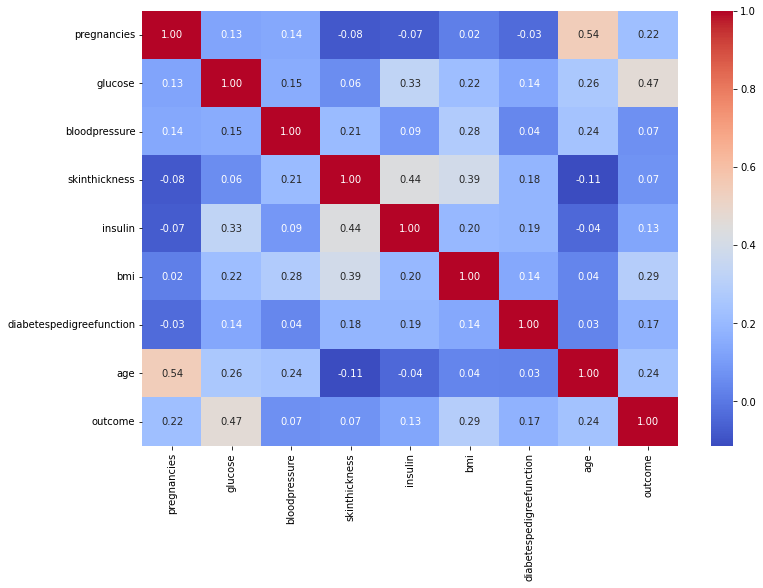

In [17]:
# checking correlation of features and target
import matplotlib.pyplot as plt
import seaborn as sns

features = diabetics_diagnosis_df.columns
corr_= diabetics_diagnosis_df[features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "coolwarm");

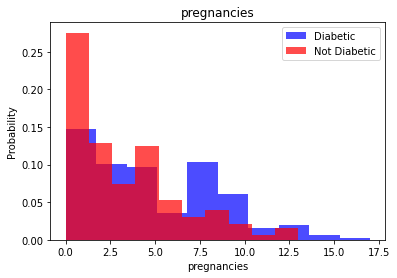

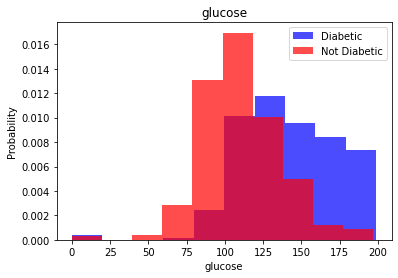

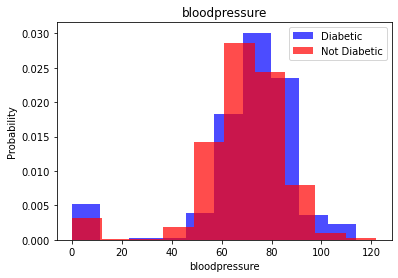

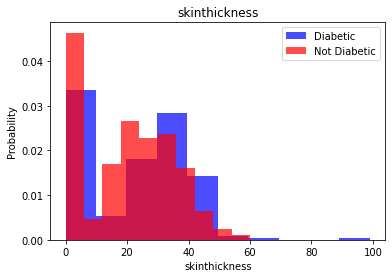

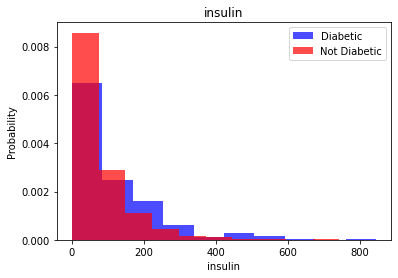

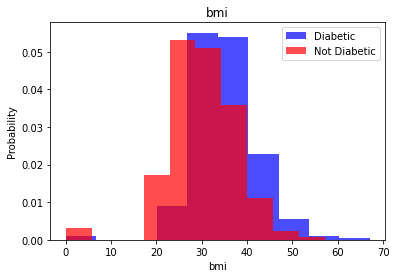

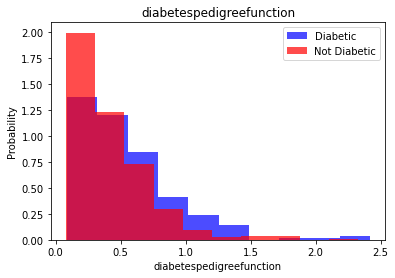

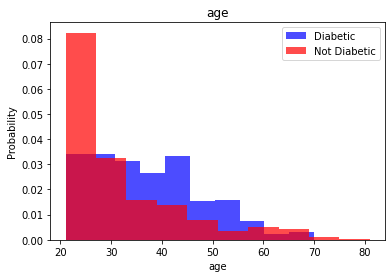

In [18]:
# Plotting Histogram for features to show relationship between them and target 
for feature in features[:-1]:
  plt.hist(diabetics_diagnosis_df[diabetics_diagnosis_df['outcome']==1][feature], color= 'blue', alpha = 0.7, label = 'Diabetic', density=True)
  plt.hist(diabetics_diagnosis_df[diabetics_diagnosis_df['outcome']==0][feature], color= 'red', alpha = 0.7, label = 'Not Diabetic', density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()

**Conclusion**
In the first graph, an increase in the features and targets affects both the probability of Diabetic and Non-diabetics. This has been evident in all the remaining graphs where an increase in the features and targets affects both the two variables in the relationship

##Data Modeling

In [19]:
# We start data modeling by checking the first five records using .head function
diabetics_diagnosis_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#(Using Decision Trees, Random Forest and Logistic Regression)
#define features and target

#importing the necessary functions from sklearn needed 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

features = diabetics_diagnosis_df.drop(['outcome'], axis=1)
target = diabetics_diagnosis_df['outcome']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=142)

# Training our models models
desc_model = DecisionTreeClassifier(random_state=12345)
forest_model = RandomForestClassifier(random_state=12345)
regression_model = LogisticRegression(random_state=12345, solver='liblinear')

desc_model.fit(x_train, y_train)
forest_model.fit(x_train, y_train)
regression_model.fit(x_train, y_train)

# Making our predictions
desc_test_predictions =desc_model.predict(x_test)
forest_test_predictions =forest_model.predict(x_test)
regression_test_predictions =regression_model.predict(x_test)



##Model Evaluation

In [21]:
# Calculating accuracy score
# Checking the accuracy of our model
from sklearn.metrics import accuracy_score 
print(f'DecisionTreeClassifier accuracy: {accuracy_score(y_test, desc_test_predictions)}')
print(f'RandomForestClassifier accuracy: {accuracy_score(y_test, forest_test_predictions)}')
print(f'LogisticRegression accuracy: {accuracy_score(y_test, regression_test_predictions)}')

DecisionTreeClassifier accuracy: 0.6875
RandomForestClassifier accuracy: 0.828125
LogisticRegression accuracy: 0.84375


In [22]:
from sklearn.metrics import classification_report
# Printing classification report for DecisionTreeClassifier
print(f'DecisionTreeClassifier classification report:\n {classification_report(y_test, desc_test_predictions)}')


DecisionTreeClassifier classification report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       123
           1       0.57      0.51      0.54        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.68       192



In [23]:

print(f'RandomForestClassifier classification report:\n {classification_report(y_test, forest_test_predictions)}')


RandomForestClassifier classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       123
           1       0.80      0.70      0.74        69

    accuracy                           0.83       192
   macro avg       0.82      0.80      0.81       192
weighted avg       0.83      0.83      0.83       192



In [ ]:
print(f'LogisticRegression classification report:\n {classification_report(y_test, regression_test_predictions)}')

##Hyparameter Tuning

In [24]:
# Tuning the hyperparameters for Decision tree classifier 
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_test)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(y_test, predictions_valid))

max_depth = 1 : 0.7395833333333334
max_depth = 2 : 0.7916666666666666
max_depth = 3 : 0.765625
max_depth = 4 : 0.7135416666666666
max_depth = 5 : 0.765625
max_depth = 6 : 0.7447916666666666
max_depth = 7 : 0.7239583333333334
max_depth = 8 : 0.7291666666666666
max_depth = 9 : 0.71875
max_depth = 10 : 0.703125
max_depth = 11 : 0.7083333333333334
max_depth = 12 : 0.6875
max_depth = 13 : 0.6875
max_depth = 14 : 0.6875
max_depth = 15 : 0.6875
max_depth = 16 : 0.6875
max_depth = 17 : 0.6875
max_depth = 18 : 0.6875
max_depth = 19 : 0.6875


In [25]:
# The best maximum depth is 2 so far
model = DecisionTreeClassifier(random_state=12345, max_depth=2)
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(accuracy_score(y_test, predictions_valid))

0.7916666666666666


In [26]:
# Tuning the hyperparameters for RandomForestClassifier()

def get_estimators():
  score = 0
  for estimators in range(1, 51):
      model = RandomForestClassifier(random_state=12345, n_estimators=estimators)
      model.fit(x_train, y_train)
      predictions_valid = model.predict(x_test)
      pred_score = accuracy_score(y_test, predictions_valid)
      if pred_score > score: 
          score = pred_score
  return print('n_estimators =', estimators, 'accuracy: ', score)

get_estimators()

n_estimators = 50 accuracy:  0.8385416666666666


In [27]:
# Tuning the hyperparameters for LogisticRegression
# You don't need to tune the hyperparameters of logistic regression. Just train it.
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)
predictions_valid = model.predict(x_test)
print(f'accuracy score is: {accuracy_score(y_test, predictions_valid)}')

accuracy score is: 0.84375


##Findings and Recommendations

From this analysis, logistic regression has given out the best and highestscore as compared to others, thus we can make a conclusion on the finding that logistic regression is the best model here